# Stock price predication
#### (using LSTM model)

In [1]:
# importing libraries and DATA 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

df=pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [2]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,14-10-2013,160.85,161.45,157.70,159.3,159.45,1281419,2039.09
1231,11-10-2013,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
1232,10-10-2013,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
1233,09-10-2013,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
1234,08-10-2013,157.00,157.80,155.20,155.8,155.80,1720413,2688.94


In [3]:
df=df.iloc[::-1]

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,08-10-2013,157.00,157.80,155.20,155.8,155.80,1720413,2688.94
1233,09-10-2013,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
1232,10-10-2013,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
1231,11-10-2013,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
1230,14-10-2013,160.85,161.45,157.70,159.3,159.45,1281419,2039.09


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83


In [6]:
df.reset_index(drop=True, inplace=True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2013,157.00,157.80,155.20,155.80,155.80,1720413,2688.94
1,09-10-2013,155.70,158.20,154.15,155.30,155.55,2049580,3204.49
2,10-10-2013,156.00,160.80,155.85,160.30,160.15,3124853,4978.80
3,11-10-2013,161.15,163.45,159.00,159.80,160.05,1880046,3030.76
4,14-10-2013,160.85,161.45,157.70,159.30,159.45,1281419,2039.09
...,...,...,...,...,...,...,...,...
1230,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
1231,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
1232,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
1233,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06


### predication for stocks closing price

In [7]:
df=df['Close']

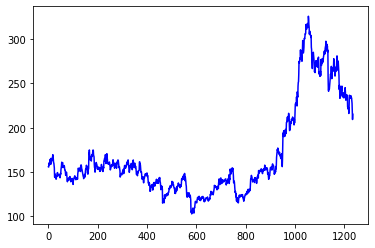

In [8]:
plt.plot(df,'b')

### Scaling prices

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
df

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

### Splitting dataset into train and test split 

In [10]:
train_size=int(len(df)*0.70)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]
train_size,test_size

(864, 371)

### Convert an array of values into a dataset matrix

In [11]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-- 49,50
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
# reshaping into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [13]:
x_train.shape,y_train.shape

((763, 100), (763,))

In [14]:
x_test.shape,y_test.shape

((270, 100), (270,))

In [15]:
# reshape input to be [samples, time steps, features] for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [16]:
x_train.shape

(763, 100, 1)

### Using LSTM model 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 258ms/step - loss: 0.0100 - val_loss: 0.1307
Epoch 2/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0025 - val_loss: 0.0468
Epoch 3/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0015 - val_loss: 0.0341
Epoch 4/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0011 - val_loss: 0.0087
Epoch 5/100
12/12 [==============================] - 2s 176ms/step - loss: 9.5998e-04 - val_loss: 0.0054
Epoch 6/100
12/12 [==============================] - 2s 192ms/step - loss: 9.2629e-04 - val_loss: 0.0063
Epoch 7/100
12/12 [==============================] - 2s 170ms/step - loss: 9.0178e-04 - val_loss: 0.0079
Epoch 8/100
12/12 [==============================] - 2s 170ms/step - loss: 8.8916e-04 - val_loss: 0.0064
Epoch 9/100
12/12 [==============================] - 2s 166ms/step - loss: 8.4978e-04 - val_loss: 0.0050
Epoch 10/100
12/12 [==============================] - 2s 183ms/step - l

### Prediction and checking performance metrics

In [20]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [21]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

141.02224963138733

In [22]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

254.75590886225544

In [23]:
y_predicated=model.predict(x_test)
y_predicated.shape

(270, 1)

In [24]:
y_test.shape

(270,)

### Graph b/w predicate and real price 

In [25]:
y_predicated=scaler.inverse_transform(y_predicated)
y_test_1=scaler.inverse_transform(np.array(y_test).reshape(-1,1))

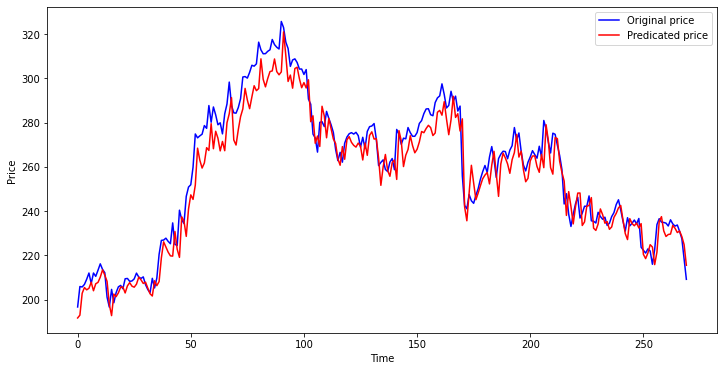

In [26]:
plt.figure(figsize=(12,6))
plt.plot(y_test_1,'b',label='Original price')
plt.plot(y_predicated,'r',label='Predicated price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Predicating future 30 Days prices 

In [27]:
# for predication i have to take previous 100 day data 
len(test_data)

371

In [28]:
# 371-100=271 
x_input=test_data[271:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

lst_output

[[0.5054447054862976],
 [0.5242617130279541],
 [0.5366925001144409],
 [0.5406090617179871],
 [0.5348264575004578],
 [0.5219063758850098],
 [0.5066055059432983],
 [0.49364638328552246],
 [0.4859609305858612],
 [0.4840588867664337],
 [0.4864457845687866],
 [0.49058300256729126],
 [0.4939187169075012],
 [0.4946891665458679],
 [0.49232831597328186],
 [0.4874247908592224],
 [0.4812997877597809],
 [0.47540947794914246],
 [0.4708256721496582],
 [0.4679659903049469],
 [0.4666072130203247],
 [0.46610400080680847],
 [0.4656883180141449],
 [0.46473637223243713],
 [0.4629335105419159],
 [0.46030569076538086],
 [0.4571375548839569],
 [0.4538259208202362],
 [0.45072850584983826],
 [0.44806137681007385]]

In [31]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [32]:
len(df)

1235

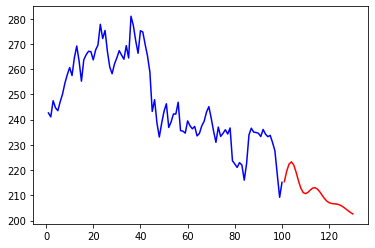

In [33]:
plt.plot(day_new,scaler.inverse_transform(df[1135:]),'b')
plt.plot(day_pred,scaler.inverse_transform(lst_output),'r')

### Next 30 days prices 

In [34]:
scaler.inverse_transform(lst_output)

array([[215.41471379],
       [219.61278818],
       [222.38609678],
       [223.25988167],
       [221.96978267],
       [219.08731246],
       [215.67368838],
       [212.78250811],
       [211.06788361],
       [210.64353764],
       [211.17605454],
       [212.09906787],
       [212.84326574],
       [213.01515306],
       [212.48844729],
       [211.39447084],
       [210.02798265],
       [208.71385453],
       [207.69120746],
       [207.05321244],
       [206.75006922],
       [206.63780258],
       [206.54506375],
       [206.33268465],
       [205.9304662 ],
       [205.34419961],
       [204.63738849],
       [203.89856293],
       [203.20752966],
       [202.61249317]])